In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from sklearn.datasets import load_digits

`digits.target[i]` -> `i`번째 이미지의 정답  
`digits.images[i]` -> `i`번째 이미지

In [2]:
digits = load_digits()
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
len(digits.images)
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

`zip(digits.images, digits.target)` -> `[(digits.images[0], digits.target[0]), ...]`

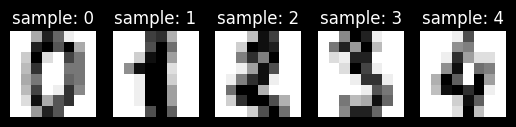

In [4]:
images_and_labels = list(zip(digits.images, digits.target))

plt.style.use('dark_background')
for idx, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'sample: {label}')
plt.show()

In [5]:
X = digits.data # input: (64, )
Y = digits.target

In [6]:
import torch
import torch.nn as nn
from torch import optim

In [17]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, padding=1, stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Linear(7*7*64, 10, bias=True)
)

lossfn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# X = torch.as_tensor(X, dtype=torch.float32)
# Y = torch.as_tensor(Y, dtype=torch.int64)



In [14]:
epochs = 100
losses = []

for epoch in range(epochs):
    avg_cost = 0

    for X, Y

    optimizer.zero_grad()

    predicted = model(X)
    loss = lossfn(predicted, Y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Epoch {epoch:4d}/{epochs} Cost: {loss.item():.6f}')

Epoch    0/100 Cost: 4.321126
Epoch   10/100 Cost: 4.114486
Epoch   20/100 Cost: 3.931614
Epoch   30/100 Cost: 3.640676
Epoch   40/100 Cost: 3.280101
Epoch   50/100 Cost: 2.880566
Epoch   60/100 Cost: 2.463403
Epoch   70/100 Cost: 2.042614
Epoch   80/100 Cost: 1.644488
Epoch   90/100 Cost: 1.282288


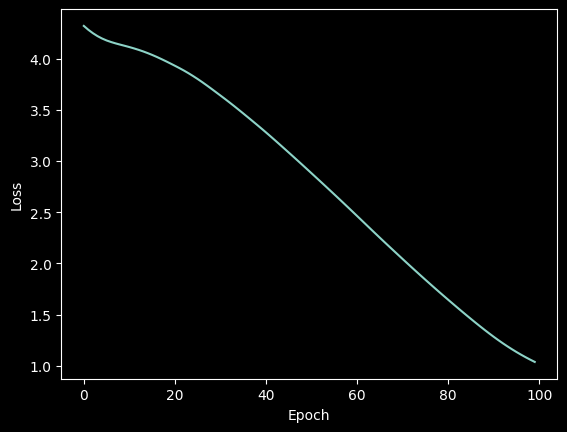

In [15]:
plt.style.use('dark_background')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(losses)
plt.show()

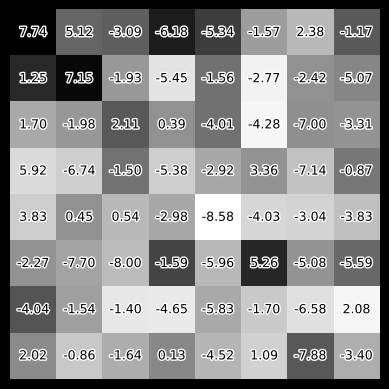

In [16]:
def show_result(input):
    pred = model(input).reshape((8, 8))

    plt.axis('off')
    plt.imshow(pred.detach().numpy(), cmap=plt.cm.gray_r, interpolation='nearest')
    for i in range(len(pred)):
        for j in range(len(pred[i])):
            plt.text(i, j, f'{pred[i, j]:.2f}', ha='center', va='center', color='black', path_effects=[path_effects.Stroke(linewidth=2, foreground='w'), path_effects.Normal()], fontsize=9)

    plt.show()

show_result(X[0])